<a href="https://colab.research.google.com/github/kmkarakaya/ML_tutorials/blob/master/How_to_solve_Multi_Label_Classification_Problems_in_Deep_Learning_with_Tensorflow_%26_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#@title Import Dependencies
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import PIL
import PIL.Image
import pandas as pd
import pathlib







---
---

---
# How to solve Multi-Label Classification Problems in Deep Learning with Tensorflow & Keras?

In this tutorial, we will focus on how to solve **Multi-Label Classification** Problems in **Deep Learning** with **Tensorflow & Keras**.

First, we will **review** the **types** of ***Classification Problems***, ***Activation & Loss functions***,  ***label encodings***, and **accuracy metrics**.

Furthermore, we will also discuss how the **target encoding** can affect the selection of Activation & Loss functions.

Moreover, we will talk about how to select **accuracy metric** correctly.

Then, in a sample multi-class classification problem, we will apply all these parameters possible values and observe their effects on **the model performance** by designing and evaluating a Keras Deep Learning Model. 

**In the end**, we will summarize the experiment results in a cheat table.



If you would like to learn more about Deep Learning with practical coding examples, please **subscribe** to [my YouTube Channel](https://www.youtube.com/channel/UCrCxCxTFL2ytaDrDYrN4_eA/playlists) or **follow** [my blog on Medium](https://medium.com/@kmkarakaya). Do not forget to turn on **Notifications** so that you will be notified when ***new parts are uploaded***.

You can access this **Colab Notebook** using [the link](https://colab.research.google.com/drive/1KsNfjXyR6A_8pN4PCc0fVhLiZoY1XJPY?usp=sharing) given in the video description below.

If you are ready, let's get started!


# PARTS
[Part A: Binary classification](https://kmkarakaya.medium.com/which-activation-loss-functions-part-a-e16f5ad6d82a) 

[Part B: Multi-Class classification](https://kmkarakaya.medium.com/which-activation-loss-functions-in-multi-class-clasification-4cd599e4e61f)

Part C: Multi-Label classification 

You can access all these parts on **YouTube** in [**ENGLISH**](https://youtube.com/playlist?list=PLQflnv_s49v-RGv6jb_sFOb_of9VOEpKG) or [**TURKISH**](https://youtube.com/playlist?list=PLQflnv_s49v8xVM2mUaUfllqeUsMtfW83)

In [33]:
from IPython.lib.display import YouTubeVideo
#YouTubeVideo('cKCt7RHfuyA')

---
# References

[ Keras API reference / Losses / Probabilistic losses](https://keras.io/api/losses/probabilistic_losses/
) 

[Keras Activation Functions](https://keras.io/api/layers/activations/)

[Tensorflow Data pipeline (tf.data) guide](https://www.tensorflow.org/guide/data#using_tfdata_with_tfkeras)

[How does tensorflow sparsecategoricalcrossentropy work?](https://stackoverflow.com/questions/59787897/how-does-tensorflow-sparsecategoricalcrossentropy-work)


[Cross-entropy vs sparse-cross-entropy: when to use one over the other](https://stats.stackexchange.com/questions/326065/cross-entropy-vs-sparse-cross-entropy-when-to-use-one-over-the-other)

[Why binary_crossentropy and categorical_crossentropy give different performances for the same problem?](https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances)

---
# Types of Classification Tasks

In general, there are three main types/categories for Classification Tasks in machine learning:

**A. binary classification** two target classes

**B. multi-class classification** more than two exclusive targets, only one class can be assigned to an input

**C. multi-label classification** more than two non exclusive targets,  one input can be labeled with multiple target classes.

We will see the details of each classification task along with an example dataset and Keras model below.





---
# Types of Label Encoding


In general, we can use different encodings for **true (actual) labels (y values)** : 
* **a floating number** (e.g. in binary classification: 1 or 0)
* **one-hot encoding** (e.g. in multi-class classification: [0 0 1 0 0])
* **a vector (array) of integers** (e.g. in multi-label classification: [14 225 3])

We will cover the all possible encodings in the following examples.

----
# Types of Activation Functions for Classification Tasks

In Keras, there are several [ Activation Functions](https://keras.io/api/layers/activations/). Below I summarize two of them:

* **Sigmoid or Logistic Activation Function:** Sigmoid function maps any input to an output ranging from **0 to 1**. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1. Sigmoid is equivalent to a 2-element Softmax, where **the second element is assumed to be zero**. **Therefore, sigmoid is mostly used for binary classification.**

Example: Assume the last layer of the model is as:

`outputs = keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)(x) `

In [34]:
# Let the last layer output vector be:
y_pred_logit = tf.constant([-20, -1.0, 0.0, 1.0, 20], dtype = tf.float32)
print("y_pred_logit:", y_pred_logit.numpy())
# and last layer activation function is sigmoid:
y_pred_prob = tf.keras.activations.sigmoid(y_pred_logit)
print("y_pred:", y_pred_prob.numpy())
print("sum of all the elements in y_pred: ",y_pred_prob.numpy().sum())

y_pred_logit: [-20.  -1.   0.   1.  20.]
y_pred: [2.0611535e-09 2.6894143e-01 5.0000000e-01 7.3105860e-01 1.0000000e+00]
sum of all the elements in y_pred:  2.5


* **Softmax function :** Softmax converts a real vector to **a vector of categorical probabilities**. The elements of the output vector are in range (0, 1) and **sum to 1**. Each vector is handled independently. **Softmax is often used** as the activation for the last layer of a **classification** network because the result could be interpreted as a probability distribution. **Therefore, Softmax is mostly used for multi-class or multi-label classification.**

For example: Assume the last layer of the model is as:

`outputs = keras.layers.Dense(3, activation=tf.keras.activations.softmax)(x) `

In [35]:
# Assume last layer output is as:
y_pred_logit = tf.constant([[-20, -1.0, 4.5], [0.0, 1.0, 20]], dtype = tf.float32)
print("y_pred_logit:\n", y_pred_logit.numpy())
# and last layer activation function is softmax:
y_pred_prob = tf.keras.activations.softmax(y_pred_logit)
print("y_pred:", y_pred_prob.numpy())
print("sum of all the elements in each vector in y_pred: ",
      y_pred_prob.numpy()[0].sum()," ", 
      y_pred_prob.numpy()[1].sum())

y_pred_logit:
 [[-20.   -1.    4.5]
 [  0.    1.   20. ]]
y_pred: [[2.2804154e-11 4.0701381e-03 9.9592990e-01]
 [2.0611535e-09 5.6027960e-09 1.0000000e+00]]
sum of all the elements in each vector in y_pred:  1.0   1.0



These two activation functions are the most used ones for classification tasks ***at the last layer***.

**PLEASE NOTE THAT**  If we **don't specify any activation** function at the last layer, no activation is applied to the outputs of the layer  (ie. **"linear" activation: a(x) = x).**

---
# Types of Loss Functions for Classification Tasks

In Keras, there are several [Loss Functions](https://keras.io/api/losses/probabilistic_losses/). Below, I summarized the ones used in **Classification** tasks:

* **BinaryCrossentropy:** Computes the cross-entropy loss between true labels and predicted labels. We use this cross-entropy loss **when there are only two label classes (assumed to be 0 and 1)**. For each example, there should be a **single floating-point value per prediction**.

* **CategoricalCrossentropy:** Computes the crossentropy loss between the labels and predictions. We use this crossentropy loss function **when there are two or more label classes.** We expect **labels to be provided in a one_hot representation**. If you want to provide labels as integers, please use SparseCategoricalCrossentropy loss. There should be # classes floating point values per feature.

* **SparseCategoricalCrossentropy:** Computes the crossentropy loss between the labels and predictions. We use this crossentropy loss function **when there are two or more label classes**. We expect **labels to be provided as integers**. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss. There should be # classes floating point values per feature for y_pred and a single floating point value per feature for y_true.



**IMPORTANT:** 
1. In Keras, **these three Cross-Entropy** functions expect two inputs: ***correct / true /actual labels*** (**y**) and ***predicted labels*** (**y_pred**):
  * As mentioned above, **correct (actual) labels** can be encoded ***floating numbers***, ***one-hot*** or ***array of integer*** values. 
  * However, the  **predicted labels** should be presented as a ***probability distribution***. 
  * If the  predicted labels are **not converted to a probability** distribution ***by the last layer*** of the model (using *sigmoid* or *softmax* activation functions), we **need to inform** these three Cross-Entropy functions by setting their **from_logits = True**. 

2. If the parameter **from_logits is set True** in any cross entropy function, then function expects ***ordinary*** numbers as **predicted label values** and apply apply **sigmoid transformation** on these predicted label values to convert them into a **probability distribution**. For details you can check the `tf.keras.backend.binary_crossentropy`  source code. Below code is taken from  TF source code:

  `if from_logits:
    return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)`


3. Both, **categorical cross entropy** and **sparse categorical cross entropy** have **the same loss function** which we have mentioned above. The **only difference** is the **format of the true labels**:
  * If ***correct (actual) labels*** are **one-hot** encoded, use **categorical_crossentropy**. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

  * But if ***correct (actual) labels*** are **integers**, use **sparse_categorical_crossentropy**. Examples for above 3-class classification problem: [1] , [2], [3]

  * The usage entirely depends on how **we load our dataset**. 
  * **One advantage of using sparse categorical cross entropy** is it saves storage in memory as well as time in computation because it simply uses a single integer for a class, rather than **a whole one-hot vector**.



I will explain the above concepts by designing models in **three** parts

---
# Types of Accuracy Metrics


Keras has [several accuracy metrics](https://keras.io/api/metrics/accuracy_metrics/). In classification, we can use 2 of them:

* **Accuracy**: Calculates how often predictions ***equal*** **labels**.

In [36]:
y_true = [[1],    [1],   [0],    [0]]
y_pred = [[0.99], [1.0], [0.01], [0.0]]
print("Which predictions equal to labels:", np.equal(y_true, y_pred).reshape(-1,))
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)
print("Accuracy: ",m.result().numpy())

Which predictions equal to labels: [False  True False  True]
Accuracy:  0.5


* **Binary Accuracy:** Calculates how often predictions ***match*** **binary labels**.

In [37]:
y_true = [[1],    [1],    [0], [0]]
y_pred = [[0.49], [0.51], [0.5], [0.51]]
m = tf.keras.metrics.binary_accuracy(y_true, y_pred, threshold=0.5)
print("Which predictions match with binary labels:", m.numpy())

m = tf.keras.metrics.BinaryAccuracy()
m.update_state(y_true, y_pred)
print("Binary Accuracy: ", m.result().numpy())

Which predictions match with binary labels: [0. 1. 1. 0.]
Binary Accuracy:  0.5


* **Categorical Accuracy:** Calculates how often predictions ***match*** **one-hot** labels.

In [38]:
# assume 3 classes exist
y_true = [[  0,   0, 1],   [  0,     1, 0]]
y_pred = [[0.1, 0.9, 0.8], [0.05, 0.95, 0.3]]

m = tf.keras.metrics.categorical_accuracy(y_true, y_pred)
print("Which predictions match with one-hot labels:", m.numpy())
m = tf.keras.metrics.CategoricalAccuracy()
m.update_state(y_true, y_pred)
print("Categorical Accuracy:", m.result().numpy())

Which predictions match with one-hot labels: [0. 1.]
Categorical Accuracy: 0.5


* **SparseCategoricalAccuracy:** Calculates how often predictions ***matches*** **integer labels**.

In [39]:
# assume 3 classes exist
y_true = [[2], [1], [0]]
y_pred = [[0.1, 0.6, 0.3], [0.05, 0.95, 0], [0.75, 0.25, 0]]

m = tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)
print("Which predictions match with one-hot labels:", m.numpy())
m = tf.keras.metrics.SparseCategoricalAccuracy()
m.update_state(y_true, y_pred)
print("Categorical Accuracy:", m.result().numpy())

Which predictions match with one-hot labels: [0. 1. 1.]
Categorical Accuracy: 0.6666667


## A. 1. True (Actual) Labels are encoded with a **single integer number** 

### First let's load the data from [Tensorflow Datasets](https://www.tensorflow.org/datasets)

In [40]:
!wget https://www.dropbox.com/s/0htmeoie69q650p/miml_dataset.zip

--2020-12-31 07:14:49--  https://www.dropbox.com/s/0htmeoie69q650p/miml_dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0htmeoie69q650p/miml_dataset.zip [following]
--2020-12-31 07:14:49--  https://www.dropbox.com/s/raw/0htmeoie69q650p/miml_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1cda339c091c3f7c238f160874.dl.dropboxusercontent.com/cd/0/inline/BGESBMfFGqMjIr0IqAOUyFguEk6GbIcj3XHQqn9-BS5dDgfldZni59t66WT4ZeZIC5GJB3DPYZhs50uf7hk6QRLkz5W0LgOTzf0jVlHd-G33ew/file# [following]
--2020-12-31 07:14:49--  https://uc1cda339c091c3f7c238f160874.dl.dropboxusercontent.com/cd/0/inline/BGESBMfFGqMjIr0IqAOUyFguEk6GbIcj3XHQqn9-BS5dDgfldZni59t66WT4ZeZIC5GJB3DPYZhs50uf7hk6QRLkz5W0LgOTzf0jVlHd-G33ew/file
Reso

In [41]:
!unzip -o -q miml_dataset.zip 

In [42]:
ls

miml_dataset/  miml_dataset.zip  miml_dataset.zip.1  sample_data/


In [43]:
df=pd.read_csv("./miml_dataset/miml_labels_1.csv")
df.head()

,Filenames,desert,mountains,sea,sunset,trees
0,1.jpg,1,0,0,0,0
1,2.jpg,1,0,0,0,0
2,3.jpg,1,0,0,0,0
3,4.jpg,1,1,0,0,0
4,5.jpg,1,0,0,0,0


In [44]:
LABELS=["desert", "mountains", "sea", "sunset", "trees"]

image count:  2000
first image:  miml_dataset/images/1297.jpg


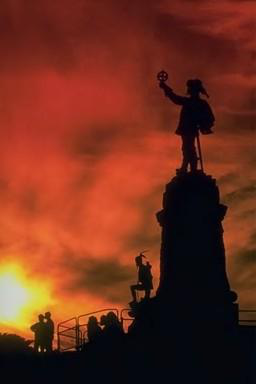

In [45]:
data_dir = pathlib.Path("miml_dataset")
images = list(data_dir.glob('images/*.jpg'))
print("image count: ", len(images))
print("first image: ", str(images[0]) )
PIL.Image.open(str(images[0]))

Number of files found:  2000
1 sample:
miml_dataset/images/637.jpg


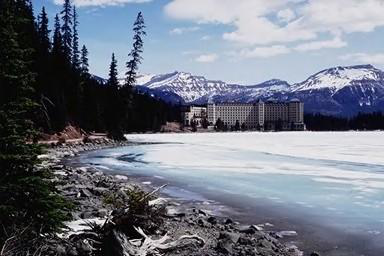

In [46]:
data_dir = pathlib.Path("miml_dataset")
filelist_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))
print("Number of files found: ", filelist_ds.cardinality().numpy())
print("1 sample:")
for a in filelist_ds.take(1):
  fname= a.numpy().decode("utf-8")
  print(fname)
PIL.Image.open(fname)   

In [47]:
def get_label(file_path):
  parts = tf.strings.split(file_path, '/')
  file_name= parts[-1]
  labels= df[df["Filenames"]==file_name][LABELS].to_numpy().squeeze()
  return tf.convert_to_tensor(labels)

In [48]:
for a in filelist_ds.take(5):
  print("file_name: ", a.numpy().decode("utf-8"))
  print(get_label(a).numpy())


file_name:  miml_dataset/images/1973.jpg
[0 0 0 0 1]
file_name:  miml_dataset/images/1103.jpg
[0 0 1 0 0]
file_name:  miml_dataset/images/733.jpg
[0 1 0 0 1]
file_name:  miml_dataset/images/1915.jpg
[0 1 0 0 1]
file_name:  miml_dataset/images/1756.jpg
[0 0 0 0 1]


In [49]:
IMG_WIDTH, IMG_HEIGHT = 32 , 32
def decode_img(img):
  #color images
  img = tf.image.decode_jpeg(img, channels=3) 
  #convert unit8 tensor to floats in the [0,1]range
  img = tf.image.convert_image_dtype(img, tf.float32) 
  #resize 
  return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT]) 

In [50]:
def combine_images_labels(file_path: tf.Tensor):
  
  label = get_label(file_path)
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [51]:
ds_size= filelist_ds.cardinality().numpy()
train_ratio = 0.80
ds_raw_train=filelist_ds.take(ds_size*train_ratio)
ds_raw_test=filelist_ds.skip(ds_size*train_ratio)

In [52]:
ds_raw_train = ds_raw_train.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)
ds_raw_train.prefetch(ds_size*train_ratio).cache()

<CacheDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.int64)>

In [53]:
ds_raw_test = ds_raw_test.map(lambda x: tf.py_function(func=combine_images_labels,
          inp=[x], Tout=(tf.float32,tf.int64)),
          num_parallel_calls=tf.data.AUTOTUNE,
          deterministic=False)
ds_raw_test.prefetch(ds_size-ds_size*train_ratio).cache()

<CacheDataset shapes: (<unknown>, <unknown>), types: (tf.float32, tf.int64)>

In [54]:
for image, label in ds_raw_test.take(5):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (32, 32, 3)
Label:  [0 0 1 0 0]
Image shape:  (32, 32, 3)
Label:  [0 0 0 1 0]
Image shape:  (32, 32, 3)
Label:  [0 1 0 0 1]
Image shape:  (32, 32, 3)
Label:  [0 1 1 0 0]
Image shape:  (32, 32, 3)
Label:  [1 0 0 0 0]


In [55]:
def covert_onehot_string_labels(label_string,label_onehot):
  labels=[]
  for i, label in  enumerate(label_string):
     if label_onehot[i]:
       labels.append(label)
  return labels
covert_onehot_string_labels(LABELS,[0,1,1,0,1])

['mountains', 'sea', 'trees']

9 samples from the dataset


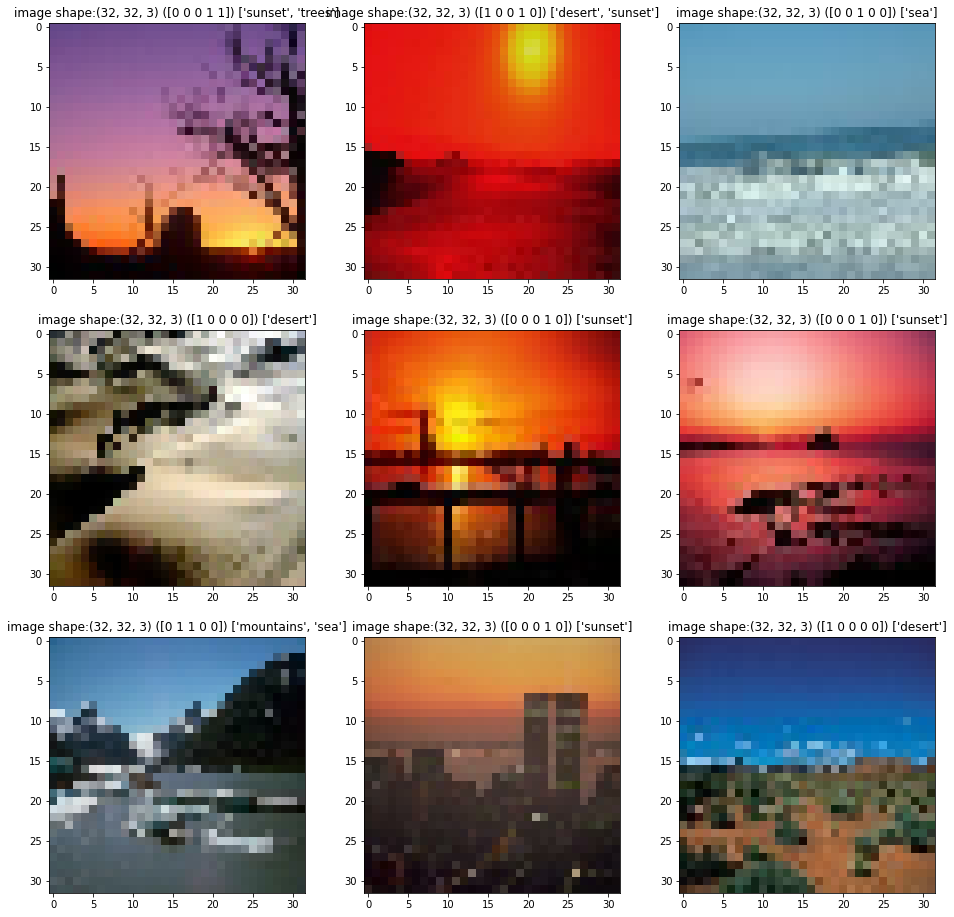

In [56]:
def show_samples(dataset):
  fig=plt.figure(figsize=(16, 16))
  columns = 3
  rows = 3
  print(columns*rows,"samples from the dataset")
  i=1
  for a,b in dataset.take(columns*rows): 
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.squeeze(a))
    plt.title("image shape:"+ str(a.shape)+" ("+str(b.numpy()) +") "+ 
              str(covert_onehot_string_labels(LABELS,b.numpy())))
    i=i+1
  plt.show()
show_samples(ds_raw_test)

In [57]:
print("Number of samples in train: ", ds_raw_train.cardinality().numpy(),
      " in test: ",ds_raw_test.cardinality().numpy())

Number of samples in train:  1600  in test:  400


In [ ]:
for image, label in ds_raw_train.take(2):
  print(image.shape, label)

(128, 128, 3) tf.Tensor([0 0 0 0 1], shape=(5,), dtype=int64)
(128, 128, 3) tf.Tensor([0 0 1 1 0], shape=(5,), dtype=int64)


9 samples from the dataset


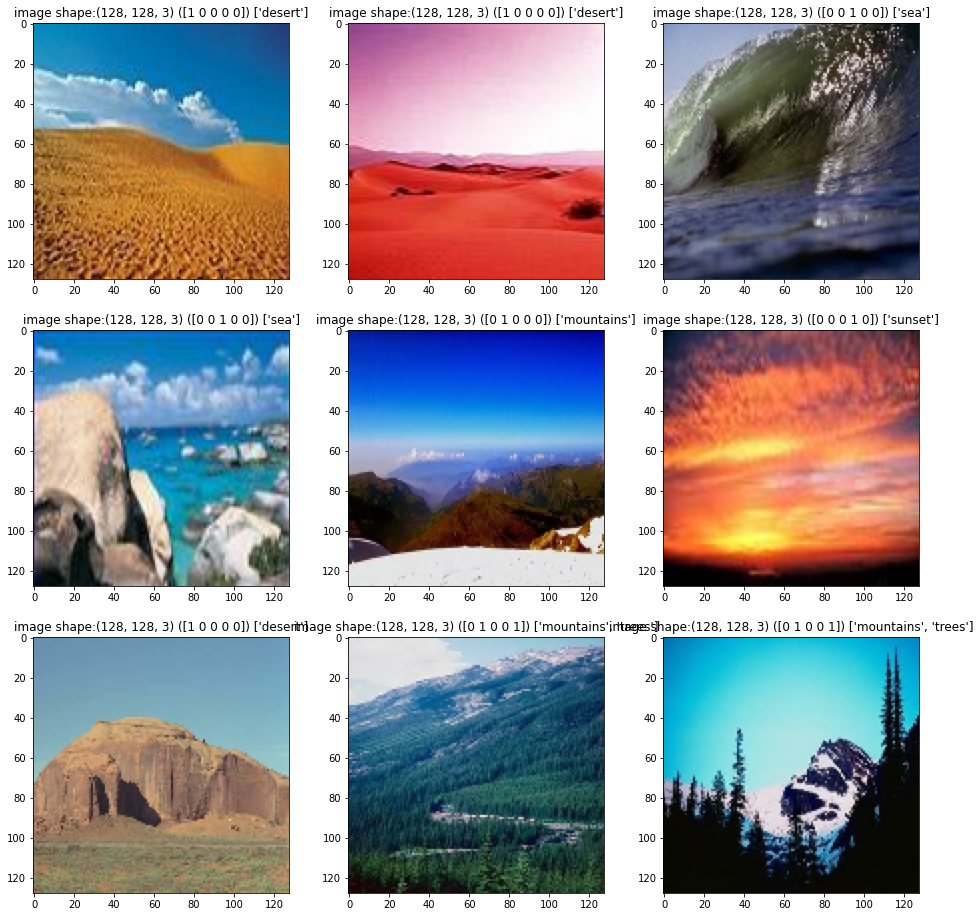

In [ ]:
show_samples(ds_raw_train)

Notice that:**
* There are **10 classes** 
* For each sample, there is a **single integer value per class** 



### Let's resize and scale the images so that we can save time in training

In [ ]:
#VGG16 expects min 32 x 32 
#def resize_scale_image(image : tf.Tensor, label: tf.Tensor):
#  image = tf.image.resize(image, [32, 32])
  #image = image/255.0
  
 # return image, label

In [ ]:
#ds_train_resize_scale=ds_raw_train.map(resize_scale_image)
'''
ds_train_resize_scale=ds_raw_train.map(lambda img,lbl: tf.py_function
                                       (func=resize_scale_image,
                                        inp=[img,lbl], 
                                        Tout=(tf.float32,tf.int64)),
                                       num_parallel_calls=tf.data.AUTOTUNE,
                                       deterministic=False
                                       )
'''

9 samples from the dataset


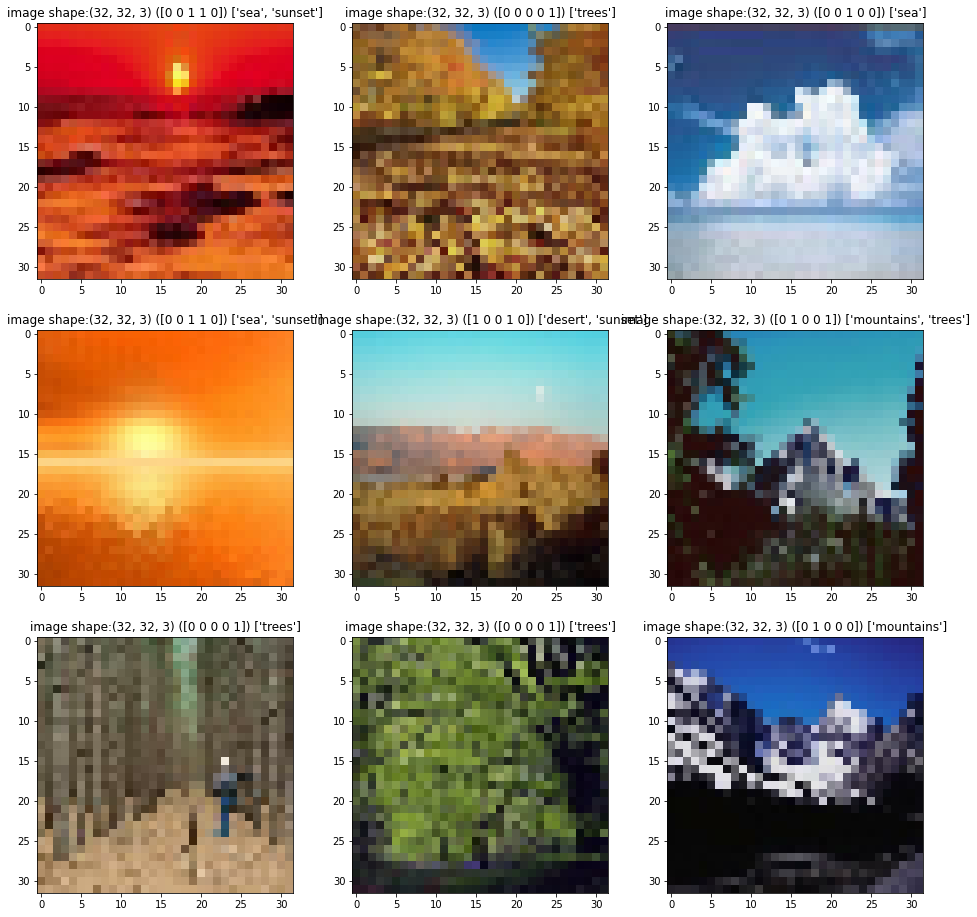

In [ ]:
#show_samples(ds_train_resize_scale)

In [ ]:
'''
ds_test_resize_scale=ds_raw_test.map(lambda img,lbl: tf.py_function
                                       (func=resize_scale_image,
                                        inp=[img,lbl], 
                                        Tout=(tf.float32,tf.int64)),
                                       num_parallel_calls=tf.data.AUTOTUNE,
                                       deterministic=False
                                       )
'''

### Prepare the data pipeline by setting batch size & buffer size using [tf.data](https://www.tensorflow.org/guide/data)

In [59]:
batch_size = 64 

#buffer_size = ds_train_resize_scale.cardinality().numpy()/10
#ds_resize_scale_batched=ds_raw.repeat(3).shuffle(buffer_size=buffer_size).batch(64, )

ds_train_batched=ds_raw_train.batch(64, drop_remainder=True )
ds_test_batched=ds_raw_test.batch(64, drop_remainder=True )

print("Number of batches in train: ", ds_train_batched.cardinality().numpy())
print("Number of batches in test: ", ds_test_batched.cardinality().numpy())


Number of batches in train:  25
Number of batches in test:  6


### To train fast, let's use Transfer Learning by importing VGG16

In [60]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3), # VGG16 expects min 32 x 32
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


### Create the classification model


In [61]:
number_of_classes = 5

In [62]:
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
initializer = tf.keras.initializers.GlorotUniform(seed=42)

activation =  None  # tf.keras.activations.sigmoid or softmax

outputs = keras.layers.Dense(number_of_classes,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
model = keras.Model(inputs, outputs)

**Pay attention**:
* The last layer has only 1 unit. So the output (***y_pred***)  will be **a single floating point** as the true (actual) label (***y_true***).

* For the last layer, the activation function can be:
  * None 
  * sigmoid 
  * softmax
* When there is **no activation** function is used in the model's last layer, we need to set `from_logits=True` **in cross-entropy loss functions** as we discussed above. Thus, **cross-entropy loss functions** will apply a **sigmoid** transformation on **predicted label values**:

  `if from_logits: return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)`


### Compile the model

In [63]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True), # default from_logits=False
              metrics=[keras.metrics.CategoricalAccuracy()])

**IMPORTANT:** We need to use **keras.metrics.SparseCategoricalAccuracy()** for **measuring** **the** **accuracy** since it calculates how often predictions matches **integer labels**.


* As we mentioned above, Keras does ***not*** define a ***single*** accuracy metric, but ***several*** different ones, among them: `accuracy`, `binary_accuracy` and `categorical_accuracy`. 
* What happens under the hood is that, if you select ***mistakenly*** **categorical cross entropy as your loss function** in a **binary classification** and if you do ***not specify*** a particular accuracy metric by just writing
 
 `metrics="Accuracy"`

  Keras (***wrongly***...) **infers** that you are interested in the **categorical_accuracy**, and this is what it returns - while in fact you are interested in the **binary_accuracy** since our problem is a binary classification.

In summary; 
* to get `model.fit()` and `model.evaulate()` run correctly (without mixing the loss function and the classification problem at hand) we need to **specify the actual accuracy metric**!
* if the true (actual) labels are encoded binary (0./1.), you need to use **keras.metrics.BinaryAccuracy()** for **measuring** **the** **accuracy** since it calculates how often predictions matches **binary labels**.

### Try & See
Now, we can try and see the performance of the model by using **combination of activation  and loss functions.**

In [ ]:
model.fit(ds_train_batched, validation_data=ds_test_batched, epochs=40)

Epoch 1/40
10/25 [===========>..................] - ETA: 5:21 - loss: 2.1824 - categorical_accuracy: 0.1650

In [ ]:
ds= ds_test_resize_scale
print("Test Accuracy: ", model.evaluate(ds.batch(batch_size=10))[1])
predictions= model.predict(ds.batch(batch_size=10).take(1))
y=[]
print("10 Sample predictions:")
for (pred,(a,b)) in zip(predictions,ds.take(10)):
  print("predicted: " , np.argmax(pred), "Actual Label: "+labels[b.numpy()]+" ("+str(b.numpy()) +")", " True" if (np.argmax(pred)==b.numpy()) else " False" )
  y.append(b.numpy())

---
## Obtained Results*:

| Activation | Loss | Accuracy |
| :- | -: | :-: |
| softmax | BinaryCrossentropy() | **ValueError: logits and labels must have the same shape ((64, 10) vs (64, 1))**
| sigmoid | BinaryCrossentropy() | **ValueError: logits and labels must have the same shape ((64, 10) vs (64, 1))**
| None | BinaryCrossentropy(from_logits=True) | **ValueError: logits and labels must have the same shape ((64, 10) vs (64, 1))**
| None | CategoricalCrossentropy(from_logits=True) |**ValueError: Shapes (64, 1) and (64, 10) are incompatible** 
| sigmoid | CategoricalCrossentropy() |**ValueError: Shapes (64, 1) and (64, 10) are incompatible**
| softmax | CategoricalCrossentropy() |**ValueError: Shapes (64, 1) and (64, 10) are incompatible**
| **softmax** | **SparseCategoricalCrossentropy()** | **0.9440**
| **sigmoid** | **SparseCategoricalCrossentropy()** | **0.9440**
| **None** | **SparseCategoricalCrossentropy(from_logits=True)** |**0.9440** 


   *When you run this notebook, most probably you would not get the exact numbers rather you would observe very similar values due to the stochastic nature of ANNs.* 


**Why do BinaryCrossentropy & CategoricalCrossentropy loss functions generate errors?**

Because, for true labels we are using **a single integer** value. 

However, the last layer outputs **a vector of size 10**(number_of_classes). 

Therefore, these loss functions can ***NOT compare a single integer with a vector!***


**Why do softmax & sigmoid activation functions with SparseCategoricalCrossentropy loss lead to the same accuracy**

* Generally, we use **softmax activation** instead of **sigmoid** with the **cross-entropy loss** because softmax activation distributes the probability throughout each output node (class).
* For **multi-class classification**, **softmax** is more recommended  rather than **sigmoid**. 
* The practical reason is that 
  * **softmax** is specially designed for **multi-class** and **multi-label** classification tasks.
  * **Sigmoid** is equivalent to a 2-element **Softmax**, where the second element is assumed to be zero. Therefore, **sigmoid** is mostly used for **binary classification**.
* The above results indicate that, with SparseCategoricalCrossentropy loss, both activation function leads to a similar performance.


**Why does SparseCategoricalCrossentropy loss functions with from_logits=True lead to good accuracy without any activation function?**

Because, using ***from_logits=True*** tells to the BinaryCrossentropy loss functions to apply its own **sigmoid** transformation over the inputs:

`if from_logits: return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)` 

[In Keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy): "***Note - Using from_logits=True may be more numerically stable.***"

             


**In summary:**

We can **conclude** that, if the task is **multi-class classification** and true (actual) labels are encoded as a **single integer number** we have 2 options to go:
  * Option 1: 
  
  activation = **sigmoid** or **softmax** 

  loss =**SparseCategoricalCrossentropy()** 
  
  accuracy metric= **SparseCategoricalAccuracy()**
  * Option 2: 
  
  activation = **None**  
  
  loss =**SparseCategoricalCrossentropy(from_logits=True)** 
  
  accuracy metric= **SparseCategoricalAccuracy()**

## A. 2. True (Actual) Labels are one-hot encoded 

In multi-class classification problems, we can also use **one-hot encoding** for **target (y_true)** values. 
Now, let's **which activation, loss, and accuracy** functions we need to select when true classes are encoded one hot.

### First convert the true (actual) label encoding to one-hot

In [ ]:
def one_hot(image, label):
  label = tf.one_hot(label, depth=number_of_classes)
  return image, label

In [ ]:
ds_train_resize_scale_one_hot= ds_train_resize_scale.map(one_hot)
ds_test_resize_scale_one_hot= ds_test_resize_scale.map(one_hot)
show_samples(ds_test_resize_scale_one_hot)

**Notice that:**
* There are **10 labels / classes** 
* Labels are now **one-hot encoded** 


### Prepare the data pipeline by setting batch size

In [ ]:
ds_train_resize_scale_one_hot_batched=ds_train_resize_scale_one_hot.batch(64)
ds_test_resize_scale_one_hot_batched=ds_test_resize_scale_one_hot.batch(64)

### Create the classification model


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)

initializer = tf.keras.initializers.GlorotUniform(seed=42)
activation = tf.keras.activations.softmax # None  #  tf.keras.activations.sigmoid or softmax

outputs = keras.layers.Dense(number_of_classes,
                             kernel_initializer=initializer,
                             activation=activation)(x) 
 
model = keras.Model(inputs, outputs)

**Pay attention**:
* The last layer has **number_of_classes (10) units**. Thus the output will support  **one-hot** encoding of the true (actual) label. 

* For the last layer, the activation function can be:
  * None 
  * sigmoid 
  * softmax
* When there is **no activation** function is used, we need to set `from_logits=True` **in cross-entropy functions** as we discussed above

### Compile the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(), # default from_logits=False
              metrics=[keras.metrics.CategoricalAccuracy()])

**IMPORTANT:** We need to use **keras.metrics.CategoricalAccuracy()** for **measuring** **the** **accuracy** since it calculates how often predictions matches **one-hot labels**. **DO NOT USE** just `metrics=['accuracy']` as a performance metric! Because, as explained above [here in details](https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances):  



### Try & See
You can try and see the performance of the model by using **combination of activation  and loss functions.**


Each epoch takes almost 15 seconds on Colab TPU accelerator.

In [ ]:
model.fit(ds_train_resize_scale_one_hot_batched, validation_data=ds_test_resize_scale_one_hot_batched, epochs=20)

In [ ]:
ds= ds_test_resize_scale_one_hot
print("Test Accuracy: ", model.evaluate(ds.batch(batch_size=10))[1])
print("10 Sample predictions ")
predictions= model.predict(ds.batch(batch_size=10).take(1))
y=[]
for (pred,(a,b)) in zip(predictions,ds.take(10)):
  print("predicted: " , (pred), "Actual Label: "+str(b.numpy()) , " True" if (np.argmax(pred)==np.argmax(b.numpy())) else " False" )
  print()
  y.append(b.numpy())

---
## Obtained Results*:


| Activation | Loss | Accuracy |
| :- | -: | :-: |
| softmax | BinaryCrossentropy() |0.9060
| sigmoid | BinaryCrossentropy() |0.9060 
| None | BinaryCrossentropy(from_logits=True) | 0.9060
| **softmax**  | **CategoricalCrossentropy()** |**0.9300**
| **sigmoid** | **CategoricalCrossentropy()** | **0.9300**
| **None** | **CategoricalCrossentropy(from_logits=True)** | **0.9300**
| softmax | SparseCategoricalCrossentropy() | InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [64,10] and labels shape [640]
| sigmoid | SparseCategoricalCrossentropy() | InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [64,10] and labels shape [640]
| None | SparseCategoricalCrossentropy(from_logits=True) | InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [64,10] and labels shape [640]

.
* When you run this notebook, most probably you would not get the exact numbers rather you would observe very similar values due to stochastic nature of ANNs.



**Why do SparseCategoricalCrossentropy loss functions generate errors?**

Because, for true labels we are using **one-hot encoding** and the last layer outputs **a vector of size 10**(number_of_classes). 

However, SparseCategoricalCrossentropy loss function expects integer numbers for true labels. Thus, SparseCategoricalCrossentropy loss function can ***NOT compute with one-hot vector!***

**Why do Binary and Categorical cross-entropy loss functions with  lead to similar accuracy?**

I would like to remind you that when two loss functions are applied to the true labels that are encoded as **one-hot**, the calculated loss values are **very similar**. 
Thus, the model converges by using the loss function results and since both functions generate similar loss functions, the resulting trained models would have similar accuracy as seen above.






**Why do Sigmoid and Softmax activation with Categorical cross-entropy loss function lead to the same accuracy?**

* Since we use **one-hot** encoding in true label encoding, sigmoid transforms all 10 numbers from the last layer to  floating numbers ranging from 0.0 to 1.0 but the sum of these 10 numbers **does not necessarily  equal to 1** (they are not probability distribution). 
* On the other hand, softmax transforms all 10 numbers from the last layer to  floating numbers ranging from 0.0 to 1.0 **and** the sum of these 10 numbers  **exactly  equals to 1.0**. 
* Normally, the Categorical cross-entropy loss function expects a probability distribution over the input values (when from_logit = False as default). 

* Even so, the  Categorical cross-entropy loss functions can consume sigmoid outputs and generate similar loss values.



According to the above experiment results, if the task is **binary classification** and true (actual) labels are encoded as a **one-hot**, we might have 2 options:
* Option A
  * activation = **None**
  * loss = **CategoricalCrossentropy(from_logits=True)**
  * accuracy metric= **CategoricalAccuracy()**
* Option B
  * activation = **sigmoid or softmax** 
  * loss =**CategoricalCrossentropy()** 
  * accuracy metric= **CategoricalAccuracy()**






# Multi-Class Classification Summary

In a nut shel, in multi-class classification 
* We can use **integer numbers** or **one-hot encoding** to encode the **true** classes / labels 
*  ***The correct accuracy metric*** depends on **the selected true label encoding**
* Last layer activation function could be **Sigmoid, Softmax or None**
* ***The correct loss function*** should be decided according to **the selected true label encoding**

So the summary of the experiments are below:

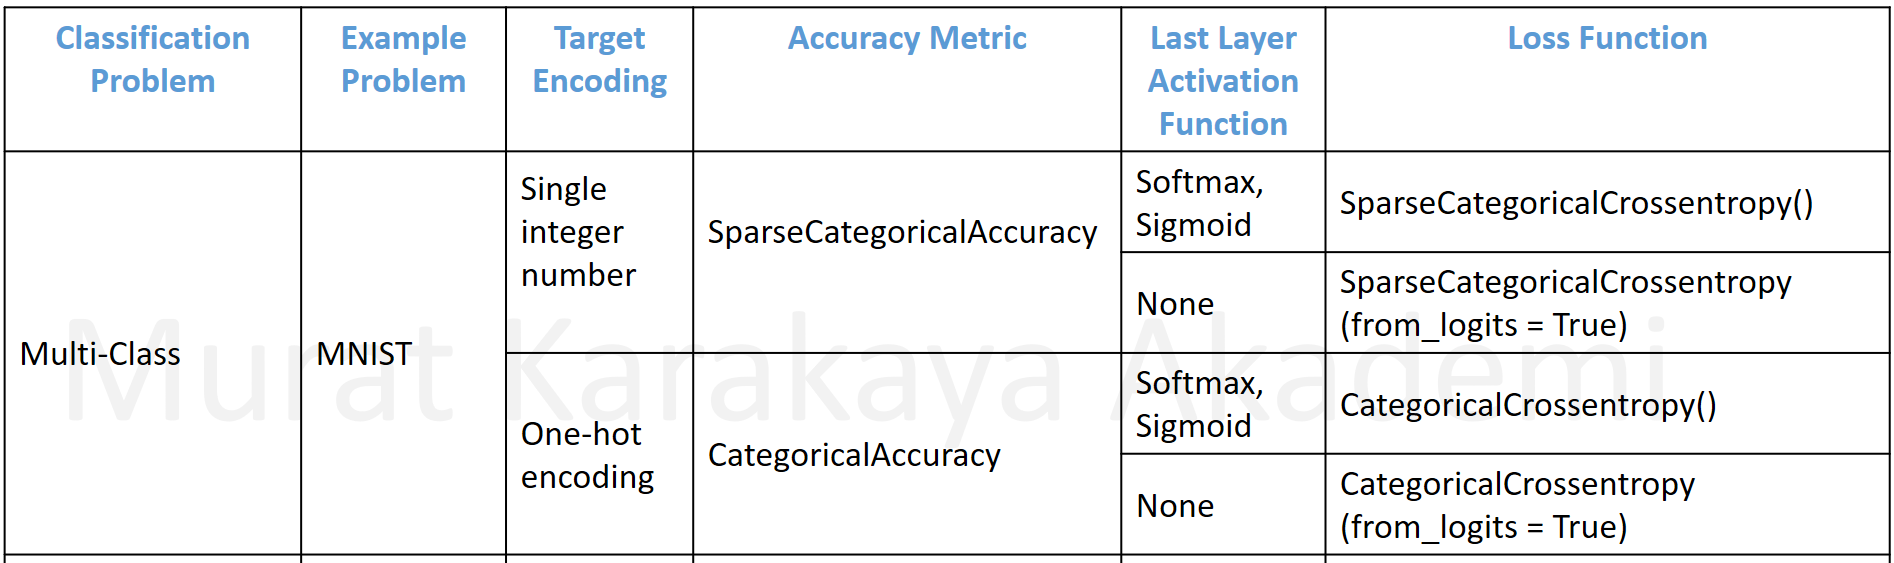

#Next: Part C: Multi-Label classification 